In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt

def load_images(folder_path, img_size=(128, 128)):
    X, y = [], []
    class_labels = {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}
    for label, idx in class_labels.items():
        class_folder = os.path.join(folder_path, label)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(idx)
    X = np.array(X) / 255.0  # Normalize images
    y = to_categorical(y, num_classes=len(class_labels))
    return X, y

# Loading the images:
X, y = load_images('/Users/damonharrington/Downloads/satellite images')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def lossy_compression(images, quality=50):
    lossy_images = []
    for img in images:
        img_pil = Image.fromarray((img * 255).astype('uint8'))
        img_pil.save('temp.jpg', format='JPEG', quality=quality)
        compressed_img = cv2.imread('temp.jpg')
        compressed_img = cv2.resize(compressed_img, img.shape[:2]) / 255.0
        lossy_images.append(compressed_img)
    return np.array(lossy_images)

def lossless_compression(images):
    lossless_images = []
    for img in images:
        img_pil = Image.fromarray((img * 255).astype('uint8'))
        img_pil.save('temp.png', format='PNG')
        compressed_img = cv2.imread('temp.png')
        compressed_img = cv2.resize(compressed_img, img.shape[:2]) / 255.0
        lossless_images.append(compressed_img)
    return np.array(lossless_images)

# Applying compression:
X_train_lossy = lossy_compression(X_train)
X_test_lossy = lossy_compression(X_test)
X_train_lossless = lossless_compression(X_train)
X_test_lossless = lossless_compression(X_test)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG

In [12]:
def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Training on uncompressed images:
model = build_cnn_model(X_train.shape[1:])
history_uncompressed = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Training on lossy compressed images:
model_lossy = build_cnn_model(X_train_lossy.shape[1:])
history_lossy = model_lossy.fit(X_train_lossy, y_train, validation_data=(X_test_lossy, y_test), epochs=10, batch_size=32)

# Training on lossless compressed images:
model_lossless = build_cnn_model(X_train_lossless.shape[1:])
history_lossless = model_lossless.fit(X_train_lossless, y_train, validation_data=(X_test_lossless, y_test), epochs=10, batch_size=32)

Epoch 1/10
141/141 [==============================] - 22s 155ms/step - loss: 0.6454 - accuracy: 0.6679 - val_loss: 0.4683 - val_accuracy: 0.8199
Epoch 2/10
141/141 [==============================] - 20s 141ms/step - loss: 0.4415 - accuracy: 0.8184 - val_loss: 0.3918 - val_accuracy: 0.8234
Epoch 3/10
141/141 [==============================] - 23s 162ms/step - loss: 0.4597 - accuracy: 0.7966 - val_loss: 0.4090 - val_accuracy: 0.8119
Epoch 4/10
141/141 [==============================] - 34s 240ms/step - loss: 0.4283 - accuracy: 0.8217 - val_loss: 0.3026 - val_accuracy: 0.8793
Epoch 5/10
141/141 [==============================] - 33s 235ms/step - loss: 0.3570 - accuracy: 0.8626 - val_loss: 0.3108 - val_accuracy: 0.8456
Epoch 6/10
141/141 [==============================] - 34s 238ms/step - loss: 0.3354 - accuracy: 0.8597 - val_loss: 0.2866 - val_accuracy: 0.8891
Epoch 7/10
141/141 [==============================] - 33s 235ms/step - loss: 0.3195 - accuracy: 0.8703 - val_loss: 0.3495 - val_ac

Epoch 1/10
141/141 [==============================] - 31s 217ms/step - loss: 0.6454 - accuracy: 0.6927 - val_loss: 0.4374 - val_accuracy: 0.8137
Epoch 2/10
141/141 [==============================] - 33s 231ms/step - loss: 0.4089 - accuracy: 0.8308 - val_loss: 0.3377 - val_accuracy: 0.8722
Epoch 3/10
141/141 [==============================] - 38s 268ms/step - loss: 0.4148 - accuracy: 0.8317 - val_loss: 0.2956 - val_accuracy: 0.8696
Epoch 4/10
141/141 [==============================] - 34s 241ms/step - loss: 0.3702 - accuracy: 0.8517 - val_loss: 0.3585 - val_accuracy: 0.8394
Epoch 5/10
141/141 [==============================] - 33s 237ms/step - loss: 0.3660 - accuracy: 0.8528 - val_loss: 0.3100 - val_accuracy: 0.8873
Epoch 6/10
141/141 [==============================] - 34s 238ms/step - loss: 0.3383 - accuracy: 0.8612 - val_loss: 0.2661 - val_accuracy: 0.8988
Epoch 7/10
141/141 [==============================] - 33s 231ms/step - loss: 0.3009 - accuracy: 0.8799 - val_loss: 0.3325 - val_ac

Epoch 1/10
141/141 [==============================] - 32s 223ms/step - loss: 0.6559 - accuracy: 0.6510 - val_loss: 0.4742 - val_accuracy: 0.6752
Epoch 2/10
141/141 [==============================] - 27s 188ms/step - loss: 0.4794 - accuracy: 0.7891 - val_loss: 0.4072 - val_accuracy: 0.7968
Epoch 3/10
141/141 [==============================] - 20s 144ms/step - loss: 0.3996 - accuracy: 0.8357 - val_loss: 0.2728 - val_accuracy: 0.9024
Epoch 4/10
141/141 [==============================] - 22s 158ms/step - loss: 0.3519 - accuracy: 0.8537 - val_loss: 0.3091 - val_accuracy: 0.8589
Epoch 5/10
141/141 [==============================] - 20s 141ms/step - loss: 0.3376 - accuracy: 0.8566 - val_loss: 0.2928 - val_accuracy: 0.8580
Epoch 6/10
141/141 [==============================] - 20s 143ms/step - loss: 0.3042 - accuracy: 0.8768 - val_loss: 0.2477 - val_accuracy: 0.8882
Epoch 7/10
141/141 [==============================] - 20s 144ms/step - loss: 0.2925 - accuracy: 0.8819 - val_loss: 0.2578 - val_ac

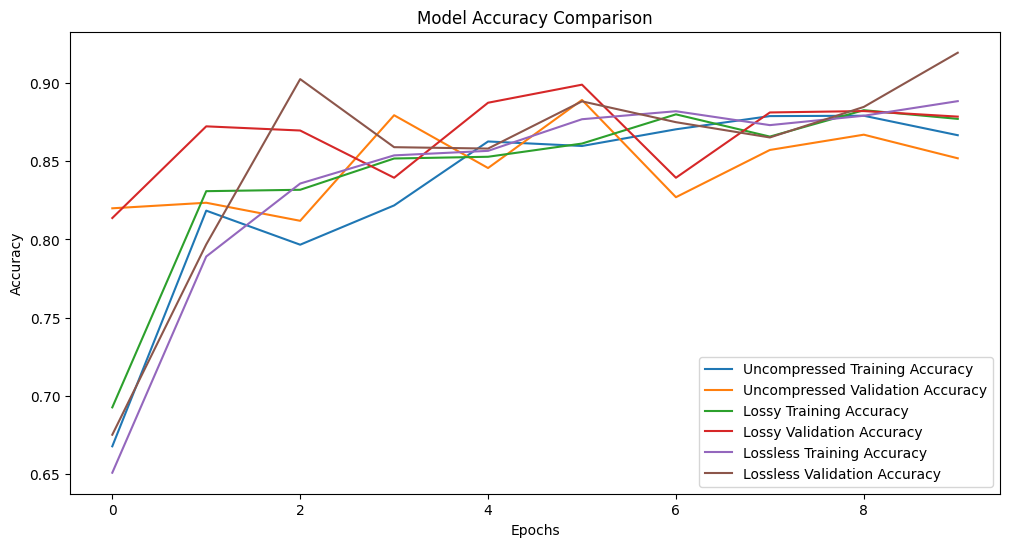

In [14]:
def plot_results(history, label):
    plt.plot(history.history['accuracy'], label=f'{label} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{label} Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.figure(figsize=(12, 6))
plot_results(history_uncompressed, 'Uncompressed')
plot_results(history_lossy, 'Lossy')
plot_results(history_lossless, 'Lossless')
plt.title('Model Accuracy Comparison')
plt.show()

In [15]:
# Record accuracy:
uncompressed_acc = history_uncompressed.history['val_accuracy'][-1]
lossy_acc = history_lossy.history['val_accuracy'][-1]
lossless_acc = history_lossless.history['val_accuracy'][-1]

print(f"Uncompressed Accuracy: {uncompressed_acc * 100:.2f}%")
print(f"Lossy Compressed Accuracy: {lossy_acc * 100:.2f}%")
print(f"Lossless Compressed Accuracy: {lossless_acc * 100:.2f}%")

Uncompressed Accuracy: 85.18%
Lossy Compressed Accuracy: 87.84%
Lossless Compressed Accuracy: 91.93%


In [16]:
def display_image_comparison(original_images, lossy_images, lossless_images, num_images=5):
    plt.figure(figsize=(12, 8))
    
    for i in range(num_images):
        # Display the original image:
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(original_images[i])
        plt.title("Original Image")
        plt.axis('off')
        
        # Display the lossy compressed image:
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(lossy_images[i])
        plt.title("Lossy Compressed")
        plt.axis('off')
        
        # Display the lossless compressed image:
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(lossless_images[i])
        plt.title("Lossless Compressed")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

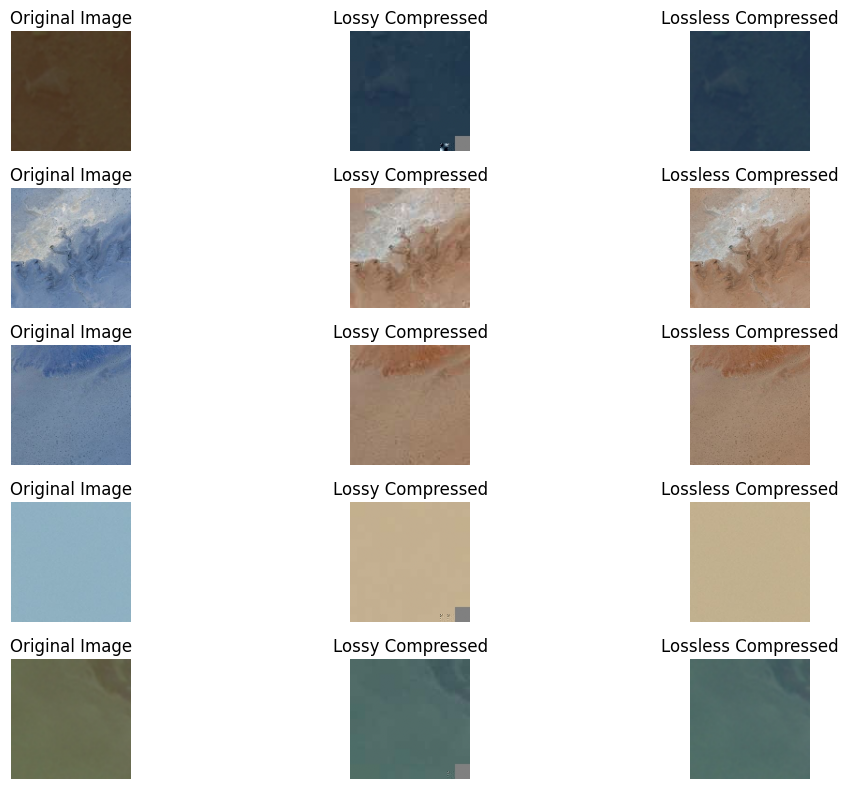

In [17]:
# Display the first 5 images from the training set for comparison:
display_image_comparison(X_train, X_train_lossy, X_train_lossless, num_images=5)

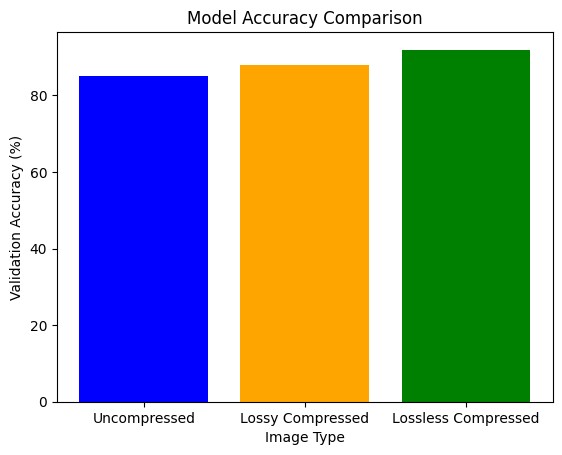

In [20]:
# Comparison chart:
import matplotlib.pyplot as plt

accuracy_data = [85.18, 87.84, 91.93]
labels = ['Uncompressed', 'Lossy Compressed', 'Lossless Compressed']

plt.bar(labels, accuracy_data, color=['blue', 'orange', 'green'])
plt.xlabel('Image Type')
plt.ylabel('Validation Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()